## 1.파일준비

In [1]:
import pandas as pd
dt = pd.read_csv('주소현황.csv',encoding='cp949')
dt

,법정동.주소,freq
0,가동리,1
1,가산리,6
2,강동,1
3,고모리,20
4,관동동,191
...,...,...
102,하계리,2
103,한림면,29
104,화목동,23
105,활천동,3


In [2]:
final = pd.read_csv('final_file.csv',encoding='cp949')
final.head()

,민원접수번호,민원등록일자,민원등록일시,민원제목,민원내용,처리기한일시,담당자지정일시,부서코드,처리부서,처리담당자,...,실처리일수,민원할당기간,민원처리기간,총처리기간,최종민원처리기한,민원인주소_시도,민원인주소_시군구,민원인주소_법정동,민원내용주소_법정동,최종민원주소
0,'201601010019445046,2016-01-01,2016-01-01 00:25:00,[생활불편스마트폰신고]장애인 전용주차 구역 불법주차[G000001131486],불법 주정차 신고 불법주차[ 상세위치설명 : 삼계동 푸르지오1차 ]\r\n경상남...,2016-01-09 18:00:00,2016-01-04 09:24:00,5350229.0,시민복지국 시민복지과,홍종하,...,NaN,3.0,0.0,3.0,2016-01-09 18:00:00,경상남도,김해시,삼계동,삼계동,삼계동
1,'201601010021535047,2016-01-01,2016-01-01 00:28:00,[생활불편스마트폰신고]장애인 전용주차 구역 불법주차[G000001131487],불법 주정차 신고 장애전용불법주차[ 상세위치설명 : 푸르지오1차 ]\r\n경상남도...,2016-01-09 18:00:00,2016-01-04 09:24:00,5350229.0,시민복지국 시민복지과,홍종하,...,NaN,3.0,0.0,3.0,2016-01-09 18:00:00,경상남도,김해시,삼계동,삼계동,삼계동
2,'201601010022585048,2016-01-01,2016-01-01 00:29:00,[생활불편스마트폰신고]장애인 전용주차 구역 불법주차[G000001131488],불법 주정차 신고 불법주차[ 상세위치설명 : 푸르지오1차 ]\r\n경상남도 김해시...,2016-01-09 18:00:00,2016-01-04 09:24:00,5350229.0,시민복지국 시민복지과,홍종하,...,NaN,3.0,0.0,3.0,2016-01-09 18:00:00,경상남도,김해시,삼계동,삼계동,삼계동
3,'201601010024225049,2016-01-01,2016-01-01 00:30:00,[생활불편스마트폰신고]장애인 전용주차 구역 불법주차[G000001131489],불법 주정차 신고 불법주차[ 상세위치설명 : ]\r\n경상남도 김해시 삼계동 1...,2016-01-09 18:00:00,2016-01-04 09:24:00,5350229.0,시민복지국 시민복지과,홍종하,...,NaN,3.0,0.0,3.0,2016-01-09 18:00:00,경상남도,김해시,삼계동,삼계동,삼계동
4,'201601011148125050,2016-01-01,2016-01-01 11:54:00,[생활불편스마트폰신고]장애인 전용주차 구역 불법주차[G000001131825],불법 주정차 신고 아파트 계시판을 통한\r\n계도를 하였으나 습관적으로\r\n상...,2016-01-09 18:00:00,2016-01-04 09:25:00,5350229.0,시민복지국 시민복지과,홍종하,...,NaN,2.0,0.0,3.0,2016-01-09 18:00:00,경상남도,김해시,안동,안동,안동


## 2. 기간별 데이터 분류

#### 1) 민원등록일시를 날짜데이터형으로 변환하기
#### 2) 민원등록일시 년, 월, 요일 추출 및 추가

In [3]:
# 민원등록일시 datetime으로 변환
final['민원등록일시'] = pd.to_datetime(final['민원등록일시'],format='%Y-%m-%d %H:%M',errors='ignore')

In [4]:
# 민원등록일시 년도 추출
pyear = final['민원등록일시'].dt.year
pyear

0       2016
1       2016
2       2016
3       2016
4       2016
        ... 
7614    2016
7615    2016
7616    2016
7617    2016
7618    2016
Name: 민원등록일시, Length: 7619, dtype: int64

In [5]:
# 민원등록일시 월 추출
pmonth = final['민원등록일시'].dt.month
pmonth

0       1
1       1
2       1
3       1
4       1
       ..
7614    6
7615    6
7616    6
7617    6
7618    6
Name: 민원등록일시, Length: 7619, dtype: int64

In [6]:
# 민원등록일시 요일 추출
pday = final['민원등록일시'].dt.dayofweek.copy()
for i in range(len(pday)):
    if pday[i] == 0:
        pday[i] = '월요일'
    elif pday[i] == 1:
        pday[i] = '화요일'
    elif pday[i] == 2:
        pday[i] = '수요일'
    elif pday[i] == 3:
        pday[i] = '목요일'
    elif pday[i] == 4:
        pday[i] = '금요일'
    elif pday[i] == 5:
        pday[i] = '토요일'
    else:
        pday[i] = '일요일'
pday

0       금요일
1       금요일
2       금요일
3       금요일
4       금요일
       ... 
7614    목요일
7615    목요일
7616    목요일
7617    목요일
7618    목요일
Name: 민원등록일시, Length: 7619, dtype: object

In [7]:
# 파일에 민원등록 년도, 월, 요일 추가
final['민원등록년도'] = pyear
final['민원등록월'] = pmonth
final['민원등록요일'] = pday
final.head()

,민원접수번호,민원등록일자,민원등록일시,민원제목,민원내용,처리기한일시,담당자지정일시,부서코드,처리부서,처리담당자,...,총처리기간,최종민원처리기한,민원인주소_시도,민원인주소_시군구,민원인주소_법정동,민원내용주소_법정동,최종민원주소,민원등록년도,민원등록월,민원등록요일
0,'201601010019445046,2016-01-01,2016-01-01 00:25:00,[생활불편스마트폰신고]장애인 전용주차 구역 불법주차[G000001131486],불법 주정차 신고 불법주차[ 상세위치설명 : 삼계동 푸르지오1차 ]\r\n경상남...,2016-01-09 18:00:00,2016-01-04 09:24:00,5350229.0,시민복지국 시민복지과,홍종하,...,3.0,2016-01-09 18:00:00,경상남도,김해시,삼계동,삼계동,삼계동,2016,1,금요일
1,'201601010021535047,2016-01-01,2016-01-01 00:28:00,[생활불편스마트폰신고]장애인 전용주차 구역 불법주차[G000001131487],불법 주정차 신고 장애전용불법주차[ 상세위치설명 : 푸르지오1차 ]\r\n경상남도...,2016-01-09 18:00:00,2016-01-04 09:24:00,5350229.0,시민복지국 시민복지과,홍종하,...,3.0,2016-01-09 18:00:00,경상남도,김해시,삼계동,삼계동,삼계동,2016,1,금요일
2,'201601010022585048,2016-01-01,2016-01-01 00:29:00,[생활불편스마트폰신고]장애인 전용주차 구역 불법주차[G000001131488],불법 주정차 신고 불법주차[ 상세위치설명 : 푸르지오1차 ]\r\n경상남도 김해시...,2016-01-09 18:00:00,2016-01-04 09:24:00,5350229.0,시민복지국 시민복지과,홍종하,...,3.0,2016-01-09 18:00:00,경상남도,김해시,삼계동,삼계동,삼계동,2016,1,금요일
3,'201601010024225049,2016-01-01,2016-01-01 00:30:00,[생활불편스마트폰신고]장애인 전용주차 구역 불법주차[G000001131489],불법 주정차 신고 불법주차[ 상세위치설명 : ]\r\n경상남도 김해시 삼계동 1...,2016-01-09 18:00:00,2016-01-04 09:24:00,5350229.0,시민복지국 시민복지과,홍종하,...,3.0,2016-01-09 18:00:00,경상남도,김해시,삼계동,삼계동,삼계동,2016,1,금요일
4,'201601011148125050,2016-01-01,2016-01-01 11:54:00,[생활불편스마트폰신고]장애인 전용주차 구역 불법주차[G000001131825],불법 주정차 신고 아파트 계시판을 통한\r\n계도를 하였으나 습관적으로\r\n상...,2016-01-09 18:00:00,2016-01-04 09:25:00,5350229.0,시민복지국 시민복지과,홍종하,...,3.0,2016-01-09 18:00:00,경상남도,김해시,안동,안동,안동,2016,1,금요일


## 3. 월별 김해시 민원 수 구하기

#### 1) 민원 건수 집계함수로 구하기
#### 2) 행번호 재세팅

In [8]:
# 월별 김해시 민원 수
minwon_months = final.groupby('민원등록월')['민원등록월'].count()
for i in range(1,len(minwon_months)+1):
    print(i,'월 ',minwon_months[i],'건')
# 행번호 재세팅
minwon_months.set_axis([i for i in range(len(minwon_months))],inplace=True)
minwon_months

1 월  953 건
2 월  1093 건
3 월  1453 건
4 월  1304 건
5 월  1431 건
6 월  1385 건


0     953
1    1093
2    1453
3    1304
4    1431
5    1385
Name: 민원등록월, dtype: int64

## 4. 월별 김해시 민원 수 시각화

#### 1) matplotlib, seaborn 라이브러리 설치하기
#### 2) 한글폰트 설정하기
#### 3) 그래프 데이터 라벨 표시하는 함수 만들기
#### 4) 막대그래프 시각화하기

In [9]:
# 패키지 설치
!pip install matplotlib
!pip install seaborn

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager,rc

# 한글 폰트 설정
font_location = 'C:/Windows/Fonts/MALGUNSL.TTF' #맑은고딕
font_name = font_manager.FontProperties(fname=font_location).get_name()
rc('font',family=font_name)
print(font_name)

Malgun Gothic


In [11]:
# 데이터 라벨 추가를 위한 함수
def add_value_label(x_list,y_list):
    for i in range(0, len(x_list)):
        plt.text(i,y_list[i]/2,y_list[i], ha="center")

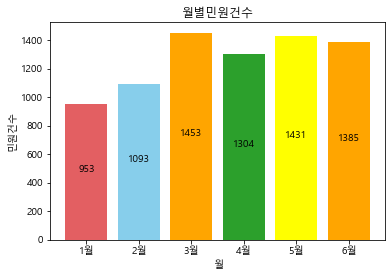

In [12]:
# 월별 민원 시각화
month_ax = plt.subplots()
month_ax = plt.bar(['1월','2월','3월','4월','5월','6월'],minwon_months,color=['#e35f62','skyblue','orange','C2','yellow','orange'])
add_value_label(['1월','2월','3월','4월','5월','6월'],minwon_months)
plt.title('월별민원건수')
plt.xlabel('월')
plt.ylabel('민원건수')
plt.show()

## 5. 요일별 김해시 민원 수 구하기

#### 1) 요일별 민원수 카운팅
#### 2) 요일별 민원수 막대그래프 시각화

In [13]:
minwon_day = final.groupby('민원등록요일')['민원등록요일'].count()
minwon_day=minwon_day[['월요일','화요일','수요일','목요일','금요일','토요일','일요일']]
minwon_day

민원등록요일
월요일    1453
화요일    1089
수요일    1214
목요일    1123
금요일    1089
토요일     823
일요일     828
Name: 민원등록요일, dtype: int64

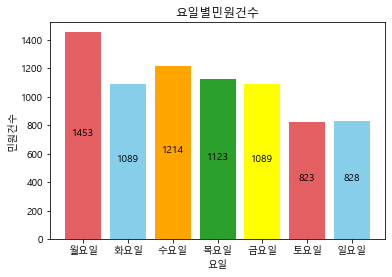

In [14]:
# 요일별 민원 시각화
days_ax = plt.subplots()
days_ax = plt.bar(['월요일','화요일','수요일','목요일','금요일','토요일','일요일'],minwon_day,color=['#e35f62','skyblue','orange','C2','yellow'])
add_value_label(['월요일','화요일','수요일','목요일','금요일','토요일','일요일'],minwon_day)
plt.title('요일별민원건수')
plt.xlabel('요일')
plt.ylabel('민원건수')
plt.show() 

## 6. 민원 건수 top3 지역 추출하기

#### 1) '주소현황.csv' 불러오기
#### 2) 순서정렬 후 행번호 재새팅
#### 3) top3지역 추출하기

In [15]:
freq_address_df = pd.read_csv('주소현황.csv',encoding='cp949')
freq_address_df

,법정동.주소,freq
0,가동리,1
1,가산리,6
2,강동,1
3,고모리,20
4,관동동,191
...,...,...
102,하계리,2
103,한림면,29
104,화목동,23
105,활천동,3


In [16]:
freq_address_df['순위'] = freq_address_df['freq'].rank(method='max',ascending=False)
# 정렬
freq_address_df = freq_address_df.sort_values('순위')
# 전체순위확인
freq_address_df
# 행번호 재세팅
freq_address_df.set_axis([i for i in range(len(freq_address_df))],inplace=True)
freq_address_df

,법정동.주소,freq,순위
0,장유면,704,1.0
1,삼계동,661,2.0
2,내동,642,3.0
3,부원동,551,4.0
4,진영리,428,5.0
...,...,...,...
102,신안리,1,107.0
103,시산리,1,107.0
104,시례리,1,107.0
105,농소리,1,107.0


In [17]:
# 1순위
top1 = freq_address_df['법정동.주소'][0]
# 2순위
top2 = freq_address_df['법정동.주소'][1]
# 3순위
top3 = freq_address_df['법정동.주소'][2]
# 순위확인
print('1순위 지역:',top1)
print('2순위 지역:',top2)
print('3순위 지역:',top3)

1순위 지역: 장유면
2순위 지역: 삼계동
3순위 지역: 내동


## 7. 동별 민원 건수 top5 지역 시각화

#### 1) 민원 top5 읍면동 막대 그래프 시각화

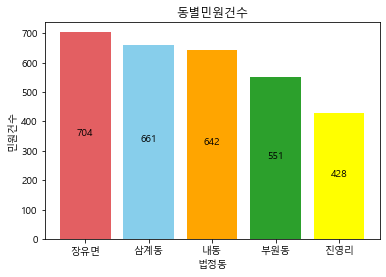

In [18]:
# 민원 top5 지역 그래프 시각화
local_ax = plt.subplots()
local_ax =plt.bar(freq_address_df['법정동.주소'][:5],freq_address_df['freq'][:5],color=['#e35f62','skyblue','orange','C2','yellow'])
add_value_label(freq_address_df['법정동.주소'][:5],freq_address_df['freq'][:5])
plt.title('동별민원건수')
plt.xlabel('법정동')
plt.ylabel('민원건수')
plt.show()

## 8. 동별 민원 건수 상위 3개 지역 월 민원건수 확인

#### 1) 민원 top1 지역 월별 민원 건수 구하기
#### 2) 민원 top2 지역 월별 민원 건수 구하기
#### 3) 민원 top3 지역 월별 민원 건수 구하기

In [19]:
# top1 지역 월별 민원 건수
top1_month = final[final['최종민원주소']==top1]
top1_months = top1_month.groupby('민원등록월')['민원등록월'].count()
print(top1,'월별 민원 건수')
for i in range(1,len(top1_months)+1):
    print(i,'월 ',top1_months[i],'건')

장유면 월별 민원 건수
1 월  92 건
2 월  156 건
3 월  164 건
4 월  210 건
5 월  79 건
6 월  3 건


In [20]:
# top2 지역 월별 민원 건수
top2_month = final[final['최종민원주소']==top2]
top2_months = top2_month.groupby('민원등록월')['민원등록월'].count()
print(top2,'월별 민원 건수')
for i in range(1,len(top2_months)+1):
    print(i,'월 ',top2_months[i],'건')

삼계동 월별 민원 건수
1 월  130 건
2 월  84 건
3 월  124 건
4 월  100 건
5 월  102 건
6 월  121 건


In [21]:
# top3 지역 월별 민원 건수
top3_month = final[final['최종민원주소']==top3]
top3_months = top3_month.groupby('민원등록월')['민원등록월'].count()
print(top3,'월별 민원 건수')
for i in range(1,len(top3_months)+1):
    print(i,'월 ',top3_months[i],'건')

내동 월별 민원 건수
1 월  71 건
2 월  79 건
3 월  116 건
4 월  113 건
5 월  148 건
6 월  115 건


## 9. 민원 처리시간 통계 구하기

#### 1) 민원할당기간, 민원처리기간, 총처리기간에 누락값 있는지 확인
#### 2) 결측치를 각 열의 평균으로 채워 넣기
#### 3) 민원처리시간 각 열의 평균 구하기
#### 기타 통계 값 확인

In [22]:
# 누락값 개수 구하기
num_rows = final.shape[0]# 전체 행 개수
num_missing = num_rows - final.count()
num_missing

민원접수번호           0
민원등록일자           0
민원등록일시           0
민원제목             0
민원내용             0
처리기한일시           0
담당자지정일시        622
부서코드           622
처리부서           622
처리담당자          622
답변일시           172
민원인주소            0
연장처리일수        7578
연장처리횟수        7578
연장처리기한        7578
실처리일수         7578
민원할당기간         622
민원처리기간         622
총처리기간          172
최종민원처리기한         0
민원인주소_시도         0
민원인주소_시군구        0
민원인주소_법정동        0
민원내용주소_법정동    3133
최종민원주소           0
민원등록년도           0
민원등록월            0
민원등록요일           0
dtype: int64

In [23]:
# 결측치를 각 열의 평균으로 채워넣기
final['민원할당기간'] = final['민원할당기간'].fillna(final['민원할당기간'].mean())
final['민원처리기간'] = final['민원처리기간'].fillna(final['민원처리기간'].mean())
final['총처리기간'] = final['총처리기간'].fillna(final['총처리기간'].mean())
final[['민원할당기간','민원처리기간','총처리기간']]

,민원할당기간,민원처리기간,총처리기간
0,3.000000,0.000000,3.000000
1,3.000000,0.000000,3.000000
2,3.000000,0.000000,3.000000
3,3.000000,0.000000,3.000000
4,2.000000,0.000000,3.000000
...,...,...,...
7614,0.480206,3.854223,4.278367
7615,0.000000,6.000000,7.000000
7616,0.480206,3.854223,4.278367
7617,0.000000,4.000000,4.000000


In [24]:
# 민원할당기간, 민원처리기간, 총 처리기간 평균 구하기
minwon_assign = final['민원할당기간'].mean()
minwon_process = final['민원처리기간'].mean()
minwon_total = final['총처리기간'].mean()

print('민원할당기간 평균: ',minwon_assign,'일')
print('민원처리기간 평균: ',minwon_process,'일')
print('총처리기간 평균: ',minwon_total,'일')

민원할당기간 평균:  0.48020580248678 일
민원처리기간 평균:  3.854223238530799 일
총처리기간 평균:  4.278367127702431 일


In [25]:
# 기타 통계
# count=갯수
# mean=평균
# std=표준편차
# min,max=최솟값,최댓값
# 25%,50%,75% = 25,50,75백분위수
final[['민원할당기간','민원처리기간','총처리기간']].describe()

,민원할당기간,민원처리기간,총처리기간
count,7619.000000,7619.000000,7619.000000
mean,0.480206,3.854223,4.278367
std,1.124707,2.801223,3.033461
min,0.000000,0.000000,0.000000
25%,0.000000,1.000000,2.000000
50%,0.000000,3.854223,4.000000
75%,0.480206,6.000000,7.000000
max,12.000000,29.000000,29.000000


## 10. 민원 처리시간 산점도 시각화

#### 1) x=민원할당기간, y=민원처리기간, z=총처리기간 산점도 시각화(z축은 색으로 구분)
#### 2) x=민원할당기간, y=총처리기간, z=민원처리기간 산점도 시각화(z축은 색으로 구분)
#### 3) x=민원처리기간, y=총처리기간, z=민원할당기간 산점도 시각화(z축은 색으로 구분)

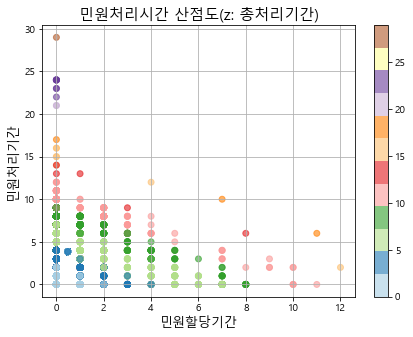

In [26]:
plt.figure(figsize=(7,5))
plt.title("민원처리시간 산점도(z: 총처리기간)", fontsize=15)
plt.scatter(final["민원할당기간"], final["민원처리기간"], c=final["총처리기간"], cmap='Paired', alpha=.6)
plt.xlabel("민원할당기간", fontsize=13)
plt.ylabel("민원처리기간", fontsize=13)
plt.grid()
plt.colorbar()
plt.show()

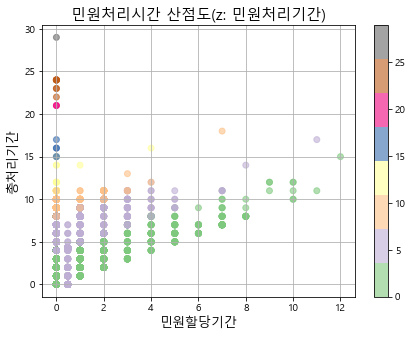

In [27]:
plt.figure(figsize=(7,5))
plt.title("민원처리시간 산점도(z: 민원처리기간)", fontsize=15)
plt.scatter(final["민원할당기간"], final["총처리기간"], c=final["민원처리기간"], cmap='Accent', alpha=.6)
plt.xlabel("민원할당기간", fontsize=13)
plt.ylabel("총처리기간", fontsize=13)
plt.grid()
plt.colorbar()
plt.show()

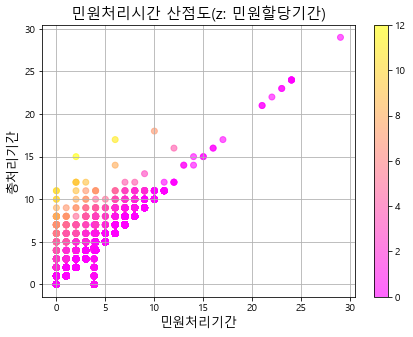

In [28]:
plt.figure(figsize=(7,5))
plt.title("민원처리시간 산점도(z: 민원할당기간)", fontsize=15)
plt.scatter(final["민원처리기간"], final["총처리기간"], c=final["민원할당기간"], cmap='spring', alpha=.6)
plt.xlabel("민원처리기간", fontsize=13)
plt.ylabel("총처리기간", fontsize=13)
plt.grid()
plt.colorbar()
plt.show()